In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("duplicate_questions_pairs (1).xls")

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
34337,34337,62926,62927,How is the weather in France during June?,Why do girls want to be thin?,0
113643,113643,185672,57259,Why are cigarettes legal and cannabis are ilegal?,Why is smoking cigarettes still legal?,0
73039,73039,125387,63749,Where can I hire a hacker who can find out the...,How do I hire a hacker to hack in to my crush'...,1
59460,59460,104134,104135,The best site to download free ebooks?,Where can I find sustainability eBooks?,0
391710,391710,194408,393443,What is the future of the robotics?,Where is the future of robotics headed?,1
388775,388775,25065,470017,How do you make melodies?,How do you make melody?,1
111359,111359,162261,22343,What is the best institute for CAT preparation...,Which is the best coaching institute for cat p...,1
268839,268839,386470,386471,How do I upload a video that is more than 30 s...,How can I upload a video file larger than 3G t...,0
353042,353042,13889,13650,Is backward time travel possible?,Is time travel possible in next 5 years?,1
285678,285678,20601,25318,How could bringing in new 500 and 2000 rupee n...,The Indian government is banning the Rs. 500 &...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
#missing values
df.isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [10]:
#duplicate raws
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

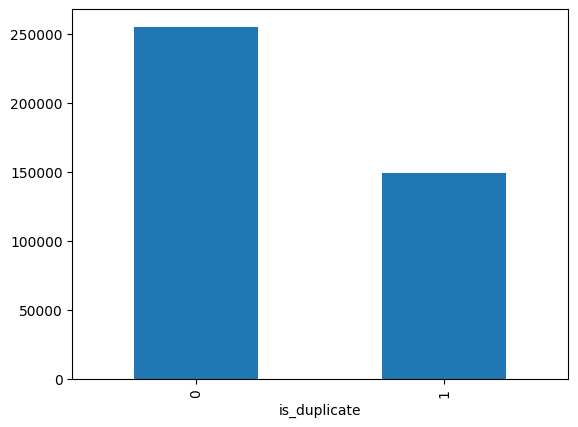

In [12]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [13]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


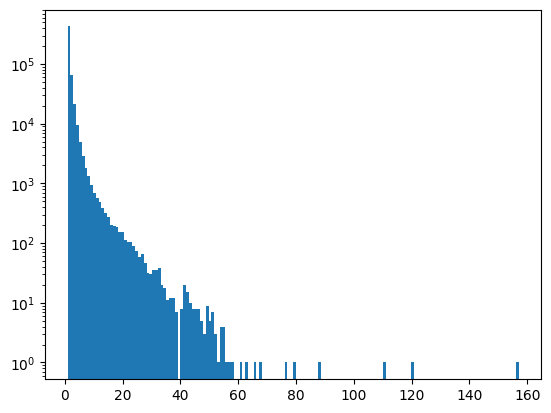

In [14]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# ONLY BOW

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df2 = pd.read_csv("duplicate_questions_pairs (1).xls") 
df2.shape

(404290, 6)

In [17]:
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [18]:
new_df = df2.sample(30000)

In [19]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [20]:
new_df.duplicated().sum()

np.int64(0)

In [21]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
140798,What is an intuitive explanation of the iron-c...,What is an intuitive explanation of the spectr...
118827,What is the correct spelling variant: boss's o...,What is the best way to deal with a boss?
51770,What are the best websites to download latest ...,Which is the best site to download latest movi...
198212,Can anyone list the best motivational quotes f...,What can you learn about people from their Fac...
236325,How can someone learn how to play pool like th...,How can I play pool like a pro?


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

# Ensure there are no NaN values in the data
ques_df['question1'] = ques_df['question1'].fillna("")
ques_df['question2'] = ques_df['question2'].fillna("")

# Assuming ques_df is a DataFrame with 'question1' and 'question2' columns
questions = list(ques_df['question1']) + list(ques_df['question2'])

# Initialize CountVectorizer with a limit on features
cv = CountVectorizer(max_features=3000)

# Fit and transform the merged text data
features = cv.fit_transform(questions).toarray()

# Validate the split index
split_index = len(ques_df['question1'])
assert features.shape[0] == 2 * split_index

q1_arr, q2_arr = np.vsplit(features, [split_index])


C:\Users\Anamika\AppData\Local\Temp\ipykernel_2664\12999989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1'] = ques_df['question1'].fillna("")
C:\Users\Anamika\AppData\Local\Temp\ipykernel_2664\12999989.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2'] = ques_df['question2'].fillna("")


In [23]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [24]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
140798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198212,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
236325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [26]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
140798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198212,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
236325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7381666666666666

In [ ]:
!pip3 install xgboost

In [ ]:
import xgboost as xgb

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

ModuleNotFoundError: No module named 'xgboost'

# BOW_with_basic_features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df3 = pd.read_csv("duplicate_questions_pairs (1).xls") 
df3.shape

In [ ]:
new_df2 = df.sample(30000,random_state=2)

In [30]:
new_df2.isnull().sum()

NameError: name 'new_df2' is not defined

In [ ]:
new_df2.head()

In [31]:
new_df2.isnull().sum()

NameError: name 'new_df2' is not defined

In [ ]:
# Distribution of duplicate and non-duplicate questions

print(new_df2['is_duplicate'].value_counts())
print((new_df2['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df2['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# Repeated questions

qid = pd.Series(new_df2['qid1'].tolist() + new_df2['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

In [ ]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
# Feature Engineering

new_df2['q1_len'] = new_df2['question1'].str.len() 
new_df2['q2_len'] = new_df2['question2'].str.len()

In [ ]:
new_df2.head()

In [ ]:
new_df2['q1_num_words'] = new_df2['question1'].apply(lambda row: len(row.split(" ")))
new_df2['q2_num_words'] = new_df2['question2'].apply(lambda row: len(row.split(" ")))
new_df2.head()

In [32]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [ ]:
new_df2['word_common'] = new_df2.apply(common_words, axis=1)
new_df2.head()

In [33]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [34]:
new_df2['word_total'] = new_df2.apply(total_words, axis=1)
new_df2.head()

NameError: name 'new_df2' is not defined

In [ ]:
new_df2['word_share'] = round(new_df2['word_common']/new_df2['word_total'],2)
new_df2.head()

In [35]:
# Analysis of features
sns.displot(new_df2['q1_len'])
print('minimum characters',new_df2['q1_len'].min())
print('maximum characters',new_df2['q1_len'].max())
print('average num of characters',int(new_df2['q1_len'].mean()))

NameError: name 'new_df2' is not defined

In [36]:
sns.displot(new_df2['q2_len'])
print('minimum characters',new_df2['q2_len'].min())
print('maximum characters',new_df2['q2_len'].max())
print('average num of characters',int(new_df2['q2_len'].mean()))

NameError: name 'new_df2' is not defined

In [37]:
sns.displot(new_df2['q1_num_words'])
print('minimum words',new_df2['q1_num_words'].min())
print('maximum words',new_df2['q1_num_words'].max())
print('average num of words',int(new_df2['q1_num_words'].mean()))

NameError: name 'new_df2' is not defined

In [38]:
sns.displot(new_df2['q2_num_words'])
print('minimum words',new_df2['q2_num_words'].min())
print('maximum words',new_df2['q2_num_words'].max())
print('average num of words',int(new_df2['q2_num_words'].mean()))

NameError: name 'new_df2' is not defined

In [39]:
# common words
sns.distplot(new_df2[new_df2['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df2[new_df2['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

NameError: name 'new_df2' is not defined

In [40]:
# total words
sns.distplot(new_df2[new_df2['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df2[new_df2['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

NameError: name 'new_df2' is not defined

In [41]:
# word share
sns.distplot(new_df2[new_df2['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df2[new_df2['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

NameError: name 'new_df2' is not defined

In [42]:
ques_df2 = new_df2[['question1','question2']]
ques_df2.head()

NameError: name 'new_df2' is not defined

In [43]:
final_df = new_df2.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

NameError: name 'new_df2' is not defined

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

# Ensure there are no NaN values in the data
ques_df2['question1'] = ques_df2['question1'].fillna("")
ques_df2['question2'] = ques_df2['question2'].fillna("")

# Assuming ques_df is a DataFrame with 'question1' and 'question2' columns
questions2 = list(ques_df2['question1']) + list(ques_df2['question2'])

# Initialize CountVectorizer with a limit on features
cv = CountVectorizer(max_features=3000)

# Fit and transform the merged text data
features = cv.fit_transform(questions2).toarray()

# Validate the split index
split_index = len(ques_df2['question1'])
assert features.shape[0] == 2 * split_index

q1_arr, q2_arr = np.vsplit(features, [split_index])

NameError: name 'ques_df2' is not defined

In [45]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df2.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df2.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

NameError: name 'ques_df2' is not defined

In [46]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

NameError: name 'final_df' is not defined

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

NameError: name 'final_df' is not defined

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7376666666666667

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)